## Working with GARS in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/18_gars.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/18_gars.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/18_gars.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/18_gars.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2gars

In [2]:
from vgrid.conversion.latlon2dggs import latlon2gars

lat = 10.775276
lon = 106.706797
res = 3
gars_id = latlon2gars(lat, lon, res)
gars_id

'574JK19'

### GARS to Polygon

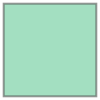

In [3]:
from vgrid.conversion.dggs2geo.gars2geo import gars2geo

gars_geo = gars2geo(gars_id)
gars_geo

### GARS to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.gars2geo import gars2geojson

gars_geojson = gars2geojson(gars_id)
# gars_geojson

### GARS Generator

In [1]:
from vgrid.generator.garsgrid import garsgrid

gars_grid = garsgrid(
    resolution=4,
    bbox=[106.50410038, 10.68281767, 106.88230310, 10.82281670],
    output_format="geoparquet",
)
# gars_grid.plot(edgecolor="white")

Generating GARS DGGS: 100%|██████████| 207/207 [00:00<00:00, 4712.42 cells/s]

Output file saved as: d:\Github\vgrid\docs\notebooks\gars_grid_4.parquet


### GARS Inspect

In [1]:
from vgrid.stats.garsstats import garsinspect

resolution = 1
gars_inspect = garsinspect(resolution)
gars_inspect.head()

Generating GARS DGGS: 100%|██████████| 259200/259200 [00:29<00:00, 8664.08 cells/s] 


gars  resolution  center_lat  center_lon   cell_width   cell_height  \
0  001AA           1      -89.75     -179.75     0.000000  55846.975448   
1  001AB           1      -89.25     -179.75   487.349067  55846.889466   
2  001AC           1      -88.75     -179.75   974.660272  55846.717528   
3  001AD           1      -88.25     -179.75  1461.895753  55846.459688   
4  001AE           1      -87.75     -179.75  1949.017659  55846.116027   

      cell_area  cell_perimeter  \
0  1.360844e+07   112181.299964   
1  4.082421e+07   113155.788271   
2  6.803661e+07   114129.991081   
3  9.524342e+07   115103.832790   
4  1.224424e+08   116077.237862   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-179.5 -90, -179.5 -89.5, -180 -89.5...    False   0.006915   
1  POLYGON ((-179.5 -89.5, -179.5 -89, -180 -89, ...    False   0.020746   
2  POLYGON ((-179.5 -89, -179.5 -88.5, -180 -88.5...    False   0.034574   
3  POLYGON ((-179.5 -88.5, -179.5 -88, -180 -88, ...    False   0.048400   
4  POLYGON ((-179.5 -88, -179.5 -87.5, -180 -87.5...    False   0.062222   

        ipq       zsc  cvh  
0  0.013589  0.116571  1.0  
1  0.040066  0.200164  1.0  
2  0.065638  0.256198  1.0  
3  0.090337  0.300561  1.0  
4  0.114195  0.337928  1.0

### GARS Normalized Area Histogram

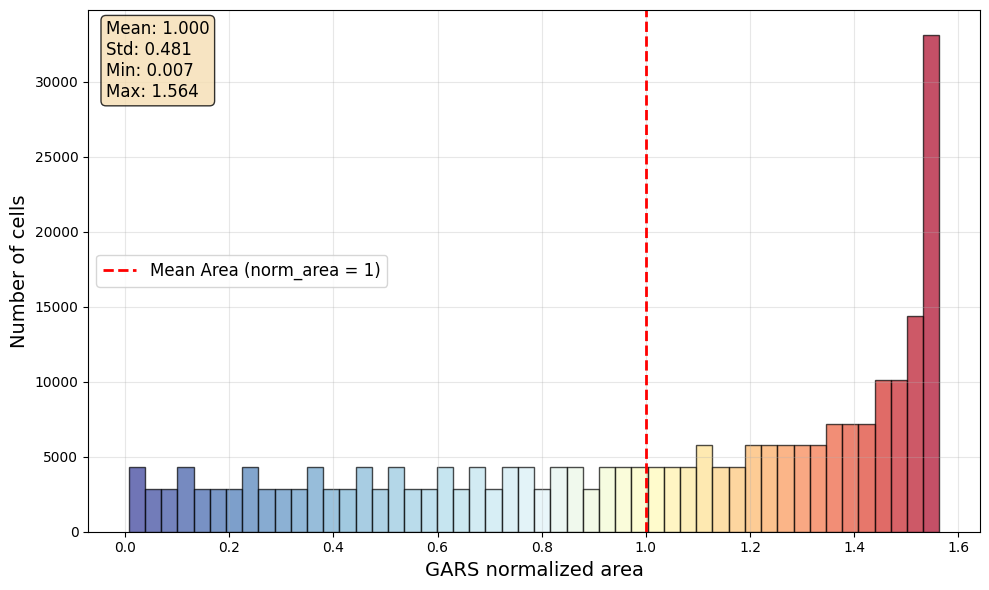

In [2]:
from vgrid.stats.garsstats import gars_norm_area_hist

gars_norm_area_hist(gars_inspect)

### Distribution of GARS Area Distortions

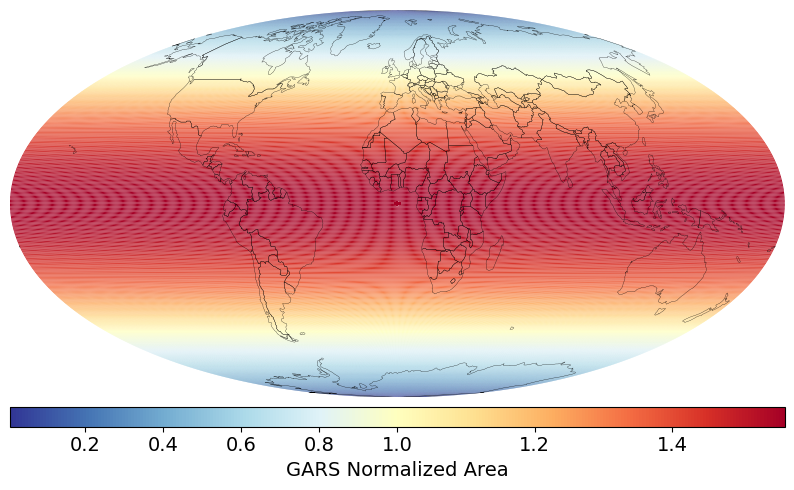

In [3]:
from vgrid.stats.garsstats import gars_norm_area

gars_norm_area(gars_inspect)

### GARS IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

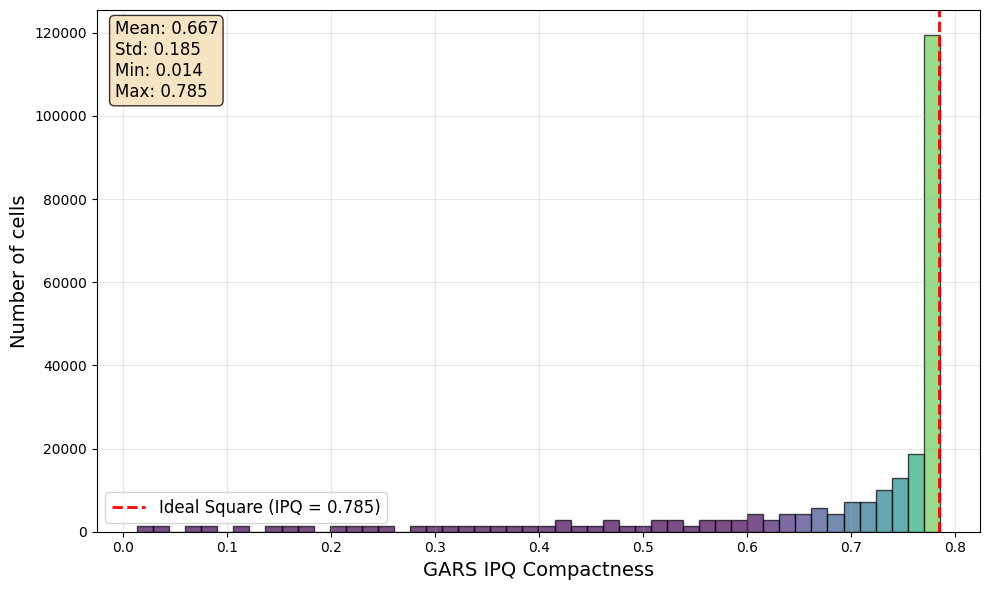

In [4]:
from vgrid.stats.garsstats import gars_compactness_ipq_hist

gars_compactness_ipq_hist(gars_inspect)

### Distribution of GARS IPQ Compactness

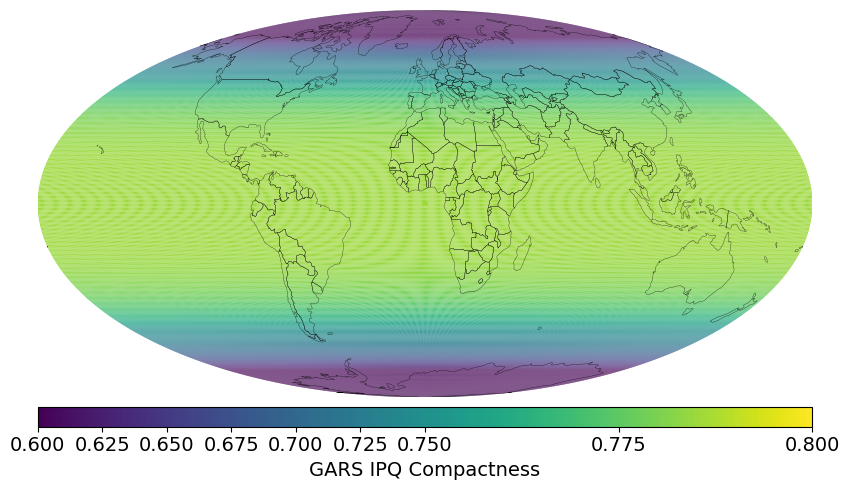

In [5]:
from vgrid.stats.garsstats import gars_compactness_ipq

gars_compactness_ipq(gars_inspect)

### GARS Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

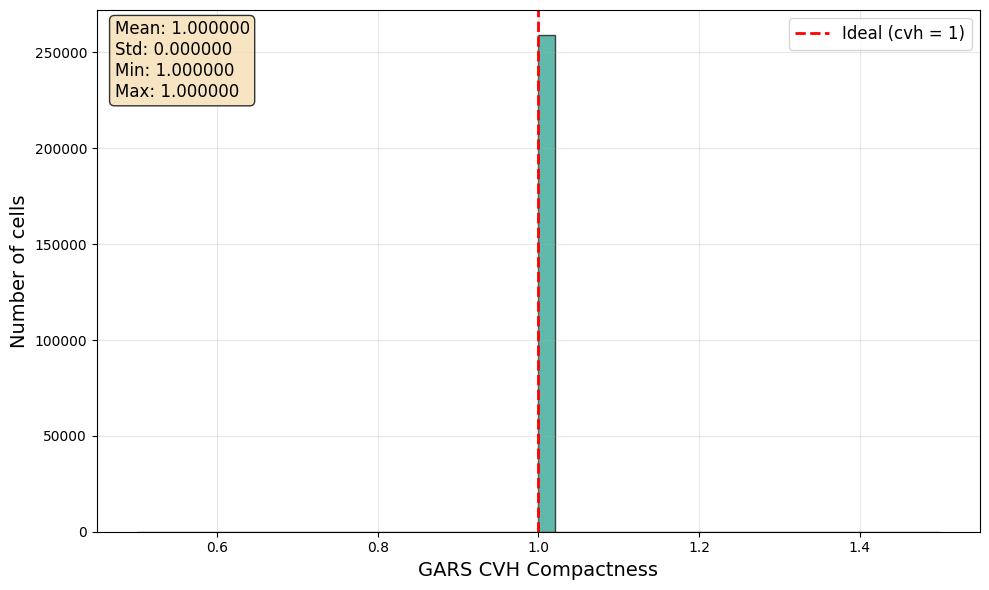

In [6]:
from vgrid.stats.garsstats import gars_compactness_cvh_hist

gars_compactness_cvh_hist(gars_inspect)

### Distribution of GARS Convex hull Compactness

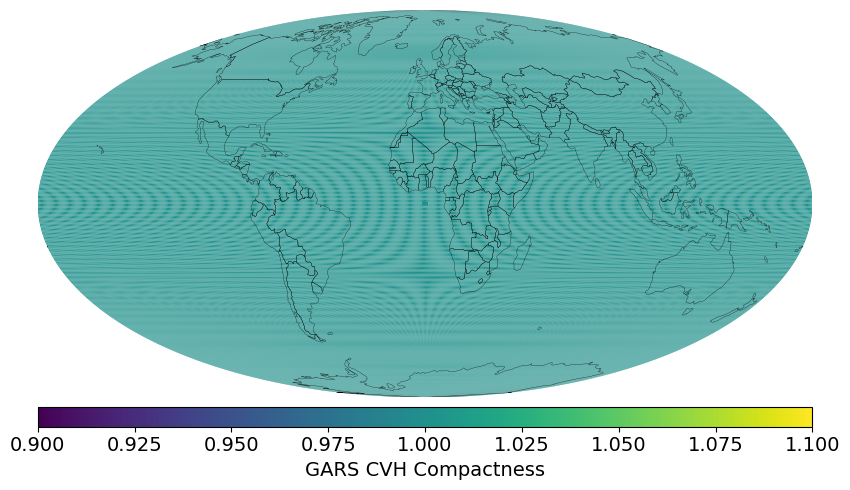

In [7]:
from vgrid.stats.garsstats import gars_compactness_cvh

gars_compactness_cvh(gars_inspect)

### GARS Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [11]:
from vgrid.stats import garsstats

garsstats("km")

resolution  number_of_cells  avg_edge_len_km  avg_cell_area_km2     cls_km
0           1           259200        44.360408        1967.845763  50.055392
1           2          1036800        22.180204         491.961441  25.027684
2           3          9331200         7.393401          54.662382   8.342560
3           4        233280000         1.478680           2.186495   1.668512